In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

60.1692445973099 -171.63077890025983
-17.24464539047119 -101.97770378631863
-31.577083060555204 72.37188467098923
-59.83257580548228 44.52215938289427
58.69947398724068 -175.0524942097804
36.05880429442901 -55.80619756540544
-61.09446295009779 173.39056491557608
53.52071661653824 124.33514384467497
12.497753664656386 -117.48291754004316
-59.659667156941964 -33.46337880145671
11.387748995929755 165.84032753467278
70.54413795385986 -145.11685314126456
45.118851814158404 -34.640367228872236
-68.08650539056212 162.10427762671776
33.96656237499455 -84.68447368958594
-1.4609509425246756 -154.27563995435082
23.226109519769793 -179.7367955277644
-35.56252667633087 -117.18364699849948
20.87546132471661 145.59414386258072
0.9714521068178499 111.16700747799581
-71.6548828741991 -83.73884092316513
-38.420872334119935 -114.40910682333238
69.54036804020512 160.2650971707049
-1.816815260028207 162.41003417945228
67.84770469096318 142.43326360508655
-76.80040821706959 -83.45206563488271
59.49768636232

38.801969735641876 -71.23376652760402
-48.816945534466925 122.94609901402168
12.208613726634013 -50.15863310546766
25.011072610779692 31.517001261072522
56.234471166608216 62.448099094950805
82.50473862493035 -26.968819463424722
-8.344151648550067 -77.40748456842222
-65.69580108002407 150.71822065093193
35.82233283198538 -49.286775816892856
-12.040222982401517 -147.398140947275
84.71300667878967 168.96154235222536
-80.98699100344064 79.09059959128871
-1.1249986516966857 -114.71116406867206
47.61236724328907 -66.66903438613166
-43.53390574538262 -26.01035850946488
-59.11544828763098 -9.737862488638143
62.20679701659384 -112.11342825924393
86.95507692381403 -106.08300881868854
-68.55860912598718 -163.0327997119122
18.1347369733232 -104.35948010679107
-83.41237557531835 39.513234684328125
-69.0234485532357 13.815023514346933
-7.866682421226045 145.22824909891585
76.01067505998753 -139.0097288101679
56.072656234844146 83.74371754823477
68.86030219135435 77.25010438962715
-84.70783443966346

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b6eef8e3a38e5bf0b12a287c0dcf07b"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4b6eef8e3a38e5bf0b12a287c0dcf07b


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | bambous virieux
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | saint george
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | taldan
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | fairbanks
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | kennesaw
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | katsuura
Processing Record 19 of Set 1 | sri aman
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | cherskiy
Processing Record 22 of Set 1 | buala
Processing Rec

Processing Record 41 of Set 4 | henties bay
Processing Record 42 of Set 4 | puerto baquerizo moreno
Processing Record 43 of Set 4 | santiago del estero
Processing Record 44 of Set 4 | kidal
Processing Record 45 of Set 4 | praia da vitoria
Processing Record 46 of Set 4 | jenison
Processing Record 47 of Set 4 | tynda
Processing Record 48 of Set 4 | kontagora
Processing Record 49 of Set 4 | bougouni
Processing Record 50 of Set 4 | albany
Processing Record 1 of Set 5 | bilma
Processing Record 2 of Set 5 | uruana
Processing Record 3 of Set 5 | notre-dame-du-lac
Processing Record 4 of Set 5 | karkaralinsk
City not found. Skipping...
Processing Record 5 of Set 5 | hobyo
Processing Record 6 of Set 5 | fuzhou
Processing Record 7 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 5 | brokopondo
Processing Record 9 of Set 5 | willowmore
Processing Record 10 of Set 5 | pevek
Processing Record 11 of Set 5 | turukhansk
Processing Record 12 of Set 5 | san andres
Proces

Processing Record 27 of Set 8 | ranong
Processing Record 28 of Set 8 | tazovskiy
Processing Record 29 of Set 8 | altamira
Processing Record 30 of Set 8 | sarakhs
Processing Record 31 of Set 8 | cartagena
Processing Record 32 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 33 of Set 8 | zhuanghe
Processing Record 34 of Set 8 | dubbo
Processing Record 35 of Set 8 | high rock
Processing Record 36 of Set 8 | tshikapa
Processing Record 37 of Set 8 | dianopolis
City not found. Skipping...
Processing Record 38 of Set 8 | jiddah
City not found. Skipping...
Processing Record 39 of Set 8 | tarut
Processing Record 40 of Set 8 | mercedes
Processing Record 41 of Set 8 | jalu
Processing Record 42 of Set 8 | sungaipenuh
Processing Record 43 of Set 8 | mpanda
Processing Record 44 of Set 8 | cockburn town
Processing Record 45 of Set 8 | banda aceh
Processing Record 46 of Set 8 | petrolandia
City not found. Skipping...
Processing Record 47 of Set 8 | warrnambool
Processing Record 48

Processing Record 15 of Set 12 | palmer
Processing Record 16 of Set 12 | jian
Processing Record 17 of Set 12 | adrar
Processing Record 18 of Set 12 | susangerd
Processing Record 19 of Set 12 | betsiamites
Processing Record 20 of Set 12 | qaqortoq
Processing Record 21 of Set 12 | greifswald
Processing Record 22 of Set 12 | uporovo
Processing Record 23 of Set 12 | broome
Processing Record 24 of Set 12 | corsicana
Processing Record 25 of Set 12 | bang saphan
Processing Record 26 of Set 12 | butka
Processing Record 27 of Set 12 | hunza
City not found. Skipping...
Processing Record 28 of Set 12 | acapulco
Processing Record 29 of Set 12 | kharan
Processing Record 30 of Set 12 | dwarka
Processing Record 31 of Set 12 | tabas
Processing Record 32 of Set 12 | samarai
Processing Record 33 of Set 12 | labrea
Processing Record 34 of Set 12 | svetlyy
Processing Record 35 of Set 12 | aswan
Processing Record 36 of Set 12 | arman
Processing Record 37 of Set 12 | marcona
City not found. Skipping...
Proc

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,37.51,81,40,2.24,RU,2022-05-25 23:02:17
1,Puerto Ayora,-0.7393,-90.3518,72.55,94,73,1.01,EC,2022-05-25 23:02:17
2,Bambous Virieux,-20.3428,57.7575,70.05,88,20,3.44,MU,2022-05-25 23:02:18
3,East London,-33.0153,27.9116,63.79,71,22,15.30,ZA,2022-05-25 23:02:18
4,Saint George,37.1041,-113.5841,97.43,11,0,5.01,US,2022-05-25 23:00:19
5,Kaitangata,-46.2817,169.8464,43.72,73,88,8.08,NZ,2022-05-25 23:02:19
6,Taldan,53.6667,124.8000,61.52,54,35,1.95,RU,2022-05-25 23:02:19
7,Cabo San Lucas,22.8909,-109.9124,84.61,64,7,12.41,MX,2022-05-25 22:57:41
8,Mar Del Plata,-38.0023,-57.5575,50.95,57,32,3.00,AR,2022-05-25 23:02:20
9,Butaritari,3.0707,172.7902,81.39,77,93,18.72,KI,2022-05-25 23:02:20


In [13]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2022-05-25 23:02:17,64.3833,-173.3000,37.51,81,40,2.24
1,Puerto Ayora,EC,2022-05-25 23:02:17,-0.7393,-90.3518,72.55,94,73,1.01
2,Bambous Virieux,MU,2022-05-25 23:02:18,-20.3428,57.7575,70.05,88,20,3.44
3,East London,ZA,2022-05-25 23:02:18,-33.0153,27.9116,63.79,71,22,15.30
4,Saint George,US,2022-05-25 23:00:19,37.1041,-113.5841,97.43,11,0,5.01
...,...,...,...,...,...,...,...,...,...
543,Sambava,MG,2022-05-25 23:18:00,-14.2667,50.1667,70.45,89,11,6.76
544,Ossora,RU,2022-05-25 23:18:01,59.2353,163.0719,39.65,87,100,4.81
545,Kamenka,RU,2022-05-25 23:18:01,51.3223,42.7678,43.36,68,100,5.12
546,Necochea,AR,2022-05-25 23:19:02,-38.5473,-58.7368,47.80,57,20,11.25


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

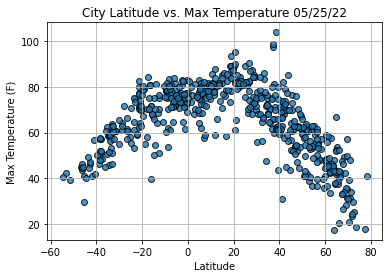

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

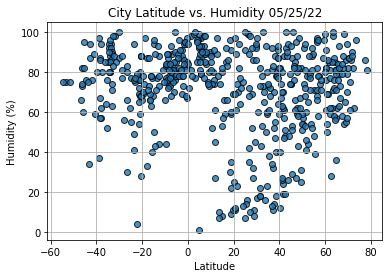

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

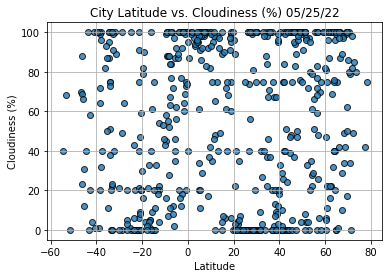

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()